# Task 3:  Number Recognition :

Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. It basically detects  the scanned images of handwritten digits

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D, MaxPooling2D,Dropout,Input

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Importing Data

In [2]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# 60,000 images for training:
x_train.shape

(60000, 28, 28)

In [4]:
# 10,000 images for testing:
x_test.shape

(10000, 28, 28)

In [5]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

#### Visualizing a part of our dataset

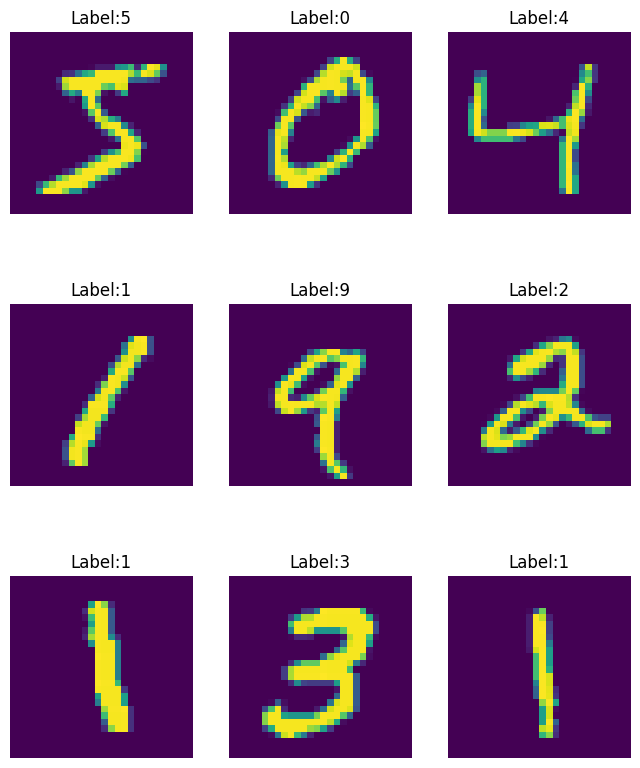

In [6]:
plt.figure(figsize=(8,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label:{y_train[i]}")
    plt.axis("off")
    

### CNN

In [7]:
model = Sequential()


# Adding an input layer to the model. BY specifying  the shape of the input data,
#  28x28 grayscale image (1 channel), which is typical for the MNIST dataset.

model.add(Input(shape=(28,28,1)))


## Convolution Layer-1
model.add(Conv2D(filters=300, kernel_size=(3,3), strides=(1,1), padding="same", activation='relu'))


# adding max-pooling to reduces the spatial dimensions of the feature maps
# while retaining the most important information.
model.add(MaxPooling2D(pool_size=(2,2)))



# Convolution Layer-2

model.add(Conv2D(filters=200, kernel_size=(3,3), strides=(1,1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



#  Adding Flatten layer  to flatten the 2D feature maps from the convolutional layers
# into a 1D vector.  This prepares the data for the fully connected (Dense) layers.
model.add(Flatten())


## First Dense Layer
model.add(Dense(units=100,activation='relu'))

# Adding a Dropout layer. dropout is a regularization technique that helps
# prevent overfitting by randomly dropping a fraction of the neurons during training
model.add(Dropout(0.5))

## Second Dense Layer
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.4))


# Adding output layer with 10 units (corresponding to the 10 possible digits in MNIST) 
# and using softmax activation fxn to computes a probability distribution over the possible classes.
model.add(Dense(units=10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 300)       3000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 300)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 200)       540200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 200)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9800)              0         
                                                                 
 dense (Dense)               (None, 100)               9

#### Compile the model

In [8]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


####  Train the model

In [9]:

history= model.fit(x_train, y_train,batch_size=64,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 27s 13ms/step - loss: 0.3986 - accuracy: 0.8741 - val_loss: 0.0473 - val_accuracy: 0.9853
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: 0.1420 - accuracy: 0.9621 - val_loss: 0.0365 - val_accuracy: 0.9895
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.1042 - accuracy: 0.9710 - val_loss: 0.0388 - val_accuracy: 0.9882
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0864 - accuracy: 0.9763 - val_loss: 0.0272 - val_accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0743 - accuracy: 0.9796 - val_loss: 0.0338 - val_accuracy: 0.9902


In [10]:
loss ,accuracy = model.evaluate(x_test,y_test)
print("Loss on Test Data:", loss)
print("Accuracy on Test data:",accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0338 - accuracy: 0.9902
Loss on Test Data: 0.03383403271436691
Accuracy on Test data: 0.9901999831199646


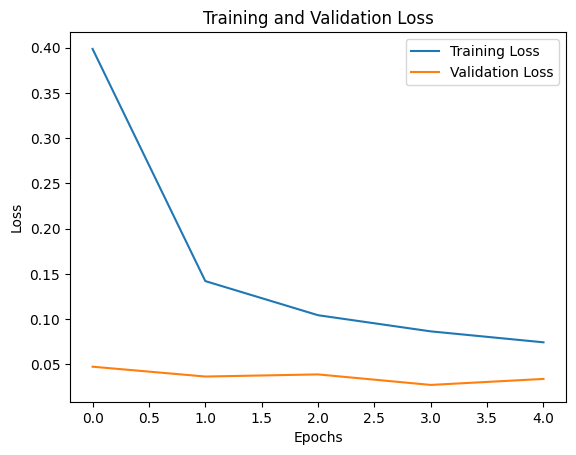

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




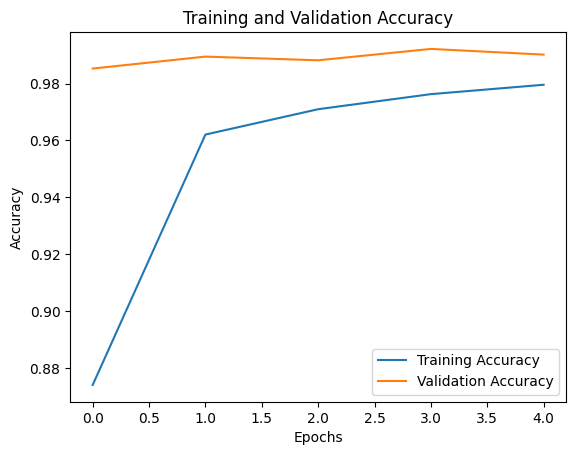

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(x_test)

y_pred = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 2ms/step


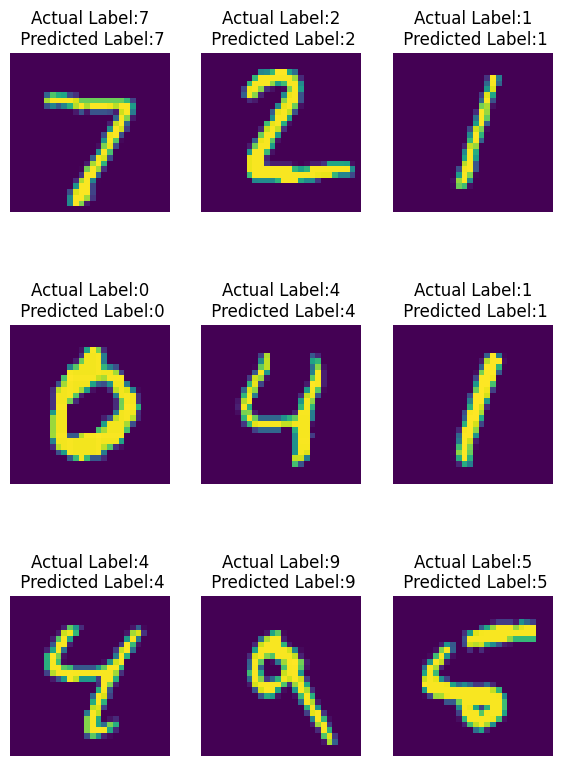

In [14]:
plt.figure(figsize=(7,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual Label:{y_test[i]}\n Predicted Label:{y_pred[i]}")
    plt.axis("off")